# SVM
 * 最流行实现：序列最小化(Sequential Minimal Optimization, SMO)算法
 * 将SVM扩展到更多数据集上：核函数(kernel)
 * 通过SVM提高手写数字识别效果
 * Warning:SVM本身是一个二类分类器，对多类问题应用SVM需要对代码做一些修改

## 最流行实现：序列最小化(Sequential Minimal Optimization, SMO)算法
 * __一种求解支持向量机二次规划的算法。__
 * 一旦求出了所有的alpha，那么分隔超平面就可以通过这些alpha来表达。这一结论十分直接， SVM中的主要工作就是求解这些alpha。(P112 6.2.1最后)

### 基于最大间隔分割数据
 * 线性可分（linearly separable）数据
 * 我们希望找到离分隔__超平面__最近的点，确保它们离分隔面的距离尽可能远。这里点到分隔面的距离被称为间隔①（margin）。
 * 支持向量（support vector）就是离分隔超平面最近的那些点。接下来要试着最大化支持向量到分隔面的距离，需要找到此问题的优化求解方法。

### 寻找最大间隔
 * 这里的最大间隔指的是 支持向量 到分割面(即超平面)的距离
 * 计算 点 A 到 分 隔 超 平 面 的 距 离 ， 就 必 须 给 出 点 到 分 隔 面 的 法 线 或 垂 线 的 长 度 ， 该 值 为|wTA+b|/||w||。

#### 分类器求解的优化问题
 * label * (wTx+b)被称为点到分隔面的函数间隔;
 * 点到分隔面的__几何__间隔
 * 拉格朗日乘子(法)
 * SVM中的主要工作就是求解这些alpha
 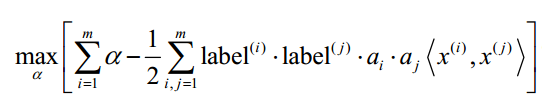
 * 上图是优化目标函数，尖括号表示 x( ) i 和 x( ) j 两个向量的内积。
 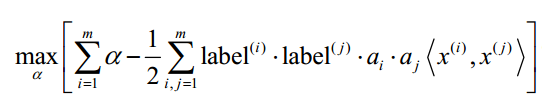
 * 上图是约束条件，这里的常数C用于控制“最大化间隔”和“保证大部分点的函数间隔小于1.0”这两个目标的权重。在优化算法的实现代码中，常数C是一个参数，因此我们就可以通过调节该参数得到不同的结果。一旦求出了所有的alpha，那么分隔超平面就可以通过这些alpha来表达。这一结论十分直接， SVM中的主要工作就是求解这些alpha。

#### SVM应用的一般框架

### SMO 高效优化算法
 * 简化版（易理解）
 * 完整版（效率高，速度快）

#### 简化版 SMO 算法
 * 处理小规模数据集

In [1]:
from numpy import *

In [2]:
def loadDataSet(fileName):
    dataMat = []
    labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = line.strip().split('\t')
        dataMat.append([float(lineArr[0]), float(lineArr[1])])
        labelMat.append(float(lineArr[2]))
    return dataMat, labelMat

# 辅助函数，用于在某个区间范围内随机选择一个整数
# i 是第一个alpha的下标，m 是所有alpha的数目
def selectJrand(i, m):
    j = i
    while (j==i):
        j = int(random.uniform(0, m))
    return j

# 辅助函数，用于在数值太大时对其进行调整
def clipAlpha(aj, H, L):
    if aj > H:
        aj = H
    if L > aj:
        aj = L
    return aj

In [4]:
dataArr, labelArr = loadDataSet('testSet.txt')
labelArr

[-1.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0]

In [ ]:
# 简化版 SMO 算法
# 输入的五个参数分别代表：数据集，类别标签，常数C，容错率和退出前最大的循环次数
def smoSimple(dataMatIn, classLabels, C, toler, maxIter):
    dataMatrix = mat(dataMatIn)
    labelMat = mat(classLabels).transpose()
    b = 0
    m, n = shape(dataMatrix)
    alphas = mat(zeros((m, 1)))
    iter = 0
    while (iter < maxIter):
        alphaPairsChanged = 0
        for i in range(m):
            fXi = float(multiply(alphas, labelMat).T*\
                       (dataMatrix*dataMatrix[i].T)) + b
            Ei = fXi - float(labelMat[i])
            if ((labelMat[i]*Ei < -toler) and (alphas[i] < C)) or \
            ((labelMat[i]*Ei > toler) and \
            (alphas[i] > 0)):
                j = selectJrand(i, m)
                fXj = float(multiply(alphas, labelMat).T*\
                           (dataMatrix*dataMatrix[i, :].T)) + b
                Ei = fXi - float(labelMat[i])
                if ((labelMat[i]*Ei < -toler) and (alphas[i] < C)) or \
                    ((labelMat[i]*Ei > toler) and \
                    (alphas[i] > 0)):
                    j = selectJrand(i, m)
                    fXj = float(multiply(alphas, labelMat).T*\
                               (dataMatrix*dataMatrix[j, :].T)) + b
                    Ej = fXj - float(labelMat[j])
                    alphaIold = alphas[i].copy()
                    alphaJold = alphas[j].copy()
                    if (labelMat[i] != labelMat[j]):
                        L = max(0, alphas[j] - alphas[i])
                        H = min(C, C + alphas[j] - alphas[i])
                    else:
                        L = max(0, alphas[j] + alphas[i] - C)
                        H = min(C, C + alphas[j] - alphas[i])
                    if L==H :
                        print 'L==H'
                        continue
                    eta = 2.0 * dataMatrix[i, :]*dataMatrix[j, :].T - \
                          dataMatrix[i, :]*dataMatrix[i, :].T - \
                          dataMatrix[j, :]*dataMatrix[j, :].T
                    if eta >= 0:
                        print 'eta>=0'
                        continue
                    alphas[i] -= labelMat[j]*(Ei - Ej)/eta
                    alphas[j] = clipAlpha(alphas[j], H, L)
                    if (abs(alphas[j] - alphaJold) < 0.00001):
                        print 'j not moving enough'
                        continue
                    alphas[i] += labelMat[j]*labelMat[i]*\
                              (alphaJold - alphas[j])
                    b1 = b - Ei - labelMat[i]*(alphas[i] - alphaIold)*\
                        dataMatrix[i, :]*dataMatrix[i, :].T - \
                        labelMat[j]*(alphas[j] - alphaJold)*\
                        dataMatrix[i, :]*dataMatrix[j, :].T
                    b2 = b - Ej - labelMat[i]*(alphas[i]-alphaIold)*\
                        dataMatrix[i, :]*dataMatrix[0].T - \
                        labelMat[j]*(alphas[j](alphas[j]-alphaJold))*\
                        dataMatrix[j, :]*dataMatrix[j, :].T
                    if (0 < alphas[i]) and (C > alphas[i]):
                        b = b1
                    elif (0 < alphas[j]) and (C > alphas[j]):
                        b = b2
                    else:
                        b = (b1 + b2)/2.0
                    alphaPairsChanged += 1
                    print 'iter: %d i: %d, pairs changed %d' % (iter.i, alphaPairsChanged)
            if (alphaPairsChanged == 0):
                iter += 1
            else:
                iter = 0
            print 'iteration number: %d' % iter
        return b, alphas